# A/B Testing

### Abstract

A/B testing, as we all know it, spliting the sample into two groups - control and treatment for experiment purpose to test the _hypothesis_.

It is usually involves data collection, analysis and forming the _hypothesis_, that can be treated as the goal. With that in hand, start the experimental design. (there are two types of experiments, observational or controlled one).

### 1. Hypothesis and experiment design

"If _____[I do this] _____, then _____[this]_____ will happen."

randomized samples
controlled variables

### 2. Sample Size Estimation
It usually comes with these default settings

Confidence Level: $\alpha = .95$  

Statistical Power:  $1-\beta = .80$

#### 2.1 Sample size for two (binomial) proportions
$n > (1.96 * .5 \div M)^2 - 4$  


#### 2.2 Sample size for two (poisson) counts
$n = 4\div(\sqrt{\lambda1} - \sqrt{\lambda2})^2$



### 3. Statistical Test

People say any tests would do, and people have different preference on choosing frequentist vs. bayesian. Or simply run an _glm_.

#### 3.1 Proportion Test (counterpart of chi-sq test)

#### 3.2 Count Data (counterpart to fisher?)


### 4. Peek-ah-Boo
Is bayes immuned from peeking? 
How bad to peek during the test? 
P-value trend ?


[1]: https://www.optimizely.com/ab-testing/ "A/B Testing Concept"
[2]: https://vwo.com/ab-testing/ "A/B Testing Concept"
[3]: https://en.wikipedia.org/wiki/A/B_testing "A/B Testing Definition"
[4]: http://www.evanmiller.org/ab-testing/poisson-means.html "A/B Testing Tool"
[5]: https://www.statstodo.com/SSiz2Counts_Tab.php "Sample size for two counts"

#### 1. Proportion Data

Confidence Interval for a:  0.47 0.53 
Confidence Interval for b:  0.52 0.58 
Probability of y > x  0.9863 
power =  0.8899 


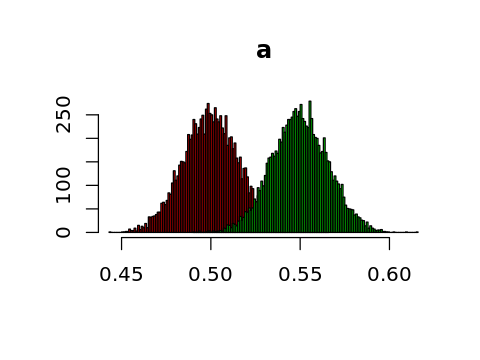

A in red, B in green 


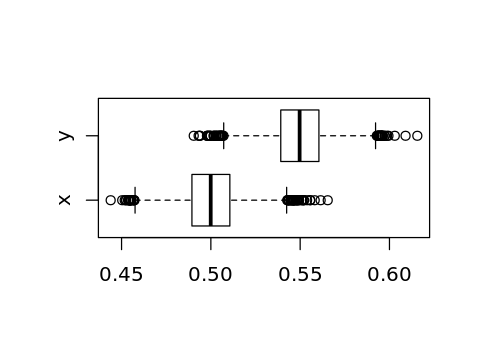

In [20]:
N = 10000
trial1 = 1000
success1 = 500
trial2 = 1000
success2 = 550
prior.trial = 1
prior.success = 1



x <- rbeta(N, success1 + prior.success, trial1 - success1 + prior.trial)
y <- rbeta(N, success2 + prior.success, trial2 - success2 + prior.trial)

xy <- cbind(x, y)

# quantile(x, c(.025, .975))
# quantile(y, c(.025, .975))

clm.x <- round(qbeta(c(.025, .975), success1 + prior.success, trial1 - success1 + prior.trial), as.integer(log10(sqrt(N))))
clm.y <- round(qbeta(c(.025, .975), success2 + prior.success, trial2 - success2 + prior.trial), as.integer(log10(sqrt(N))))

cat("Confidence Interval for x: ", clm.x, "\n")
cat("Confidence Interval for y: ", clm.y, "\n")

cat("Probability of y > x ", sum(y > x) /N, "\n")
cat("power = ", sum(y > quantile(x, .975)) / N, "\n")   # rough power
# sum(y > qbeta(.975, success1+1, trial1-success1+1)) /N

options(repr.plot.width=4, repr.plot.height=3)


hist(x, xlim=c(min(xy), max(xy)), freq=T, breaks=100, col="red", main="a", xlab=NULL, ylab=NULL)  # A in red
hist(y, add=T, freq=T, breaks=100, col="green", main="     b", xlab=NULL, ylab=NULL) # B in green


boxplot(cbind(x, y), horizontal=T)
cat("X in red, Y in green \n")

#### 2. Count Data

Confidence Interval for a:  6.89 16.05 
Confidence Interval for b:  8.9 19.05 
Probability of b > a  0.7589 
power =  0.1667 
A in red, B in green

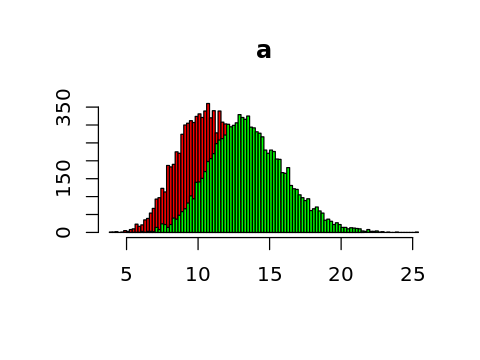

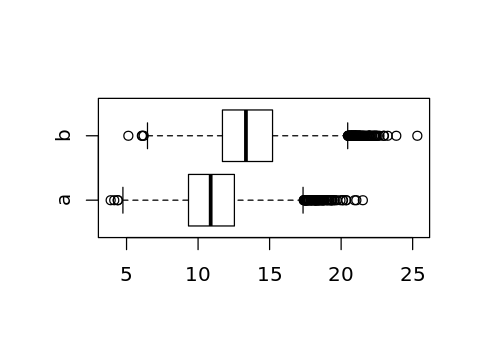

In [22]:
prior.c = 2
prior.n = 1

c1 = 20
n1 = 1
c2 = 25
n2 = 1


a <- rgamma(N, c1 + prior.c, n1 + prior.n)
b <- rgamma(N, c2 + prior.c, n2 + prior.n)

ab <- cbind(a, b)

clm.a <- round(qgamma(c(.025, .975), c1 + prior.c, n1 + prior.n), as.integer(log10(sqrt(N))))
clm.b <- round(qgamma(c(.025, .975), c2 + prior.c, n2 + prior.n), as.integer(log10(sqrt(N))))

cat("Confidence Interval for a: ", clm.a, "\n")
cat("Confidence Interval for b: ", clm.b, "\n")

cat("Probability of b > a ", sum(b > a) /N, "\n")
cat("power = ", sum(b > quantile(a, .975)) / N, "\n")   # rough power

# sum(b > qgamma(.975, c1 + prior.c, n1 + prior.n)) /N


hist(a, xlim=c(min(ab), max(ab)), freq=T, breaks=100, col="red", main="a", xlab=NULL, ylab=NULL)   # A in red
par(new=T)
hist(b, add = T, freq=T, breaks=100, col="green", main="     b", xlab=NULL, ylab=NULL) # B in green

cat("A in red, B in green")

#quantile(a, c(.025, .975))
#quantile(b, c(.025, .975))



boxplot(cbind(a, b), horizontal=T)